In [161]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [162]:
df = pd.read_csv('/content/Megy_data_1.csv')

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 43 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     1101 non-null   int64  
 1   id                                             1101 non-null   int64  
 2   orig_c1                                        1101 non-null   object 
 3   orig_c2                                        322 non-null    object 
 4   c1                                             1101 non-null   object 
 5   c2                                             322 non-null    object 
 6   c3                                             9 non-null      object 
 7   formula_combined                               1101 non-null   object 
 8   chemical_formula                               533 non-null    object 
 9   x                                              1101 

In [164]:
df = df.drop(columns=['Unnamed: 0'])

In [165]:
new_column_names = {
    'area/volume': 'area_volume',
    'max/min': 'max_min',
    'common_spin': 'org_coating_HAcceptors',
    'Effective anisotropy constant (J/m3)': 'eff_anisotropy_const',
    'magnetic anisotropy constant (J/m3)': 'magn_anisotropy_const',
    'magnetocrystalline anisotropy constant (J/m3)': 'magnetocrystalline_anisotropy_const',
    'Anisotropy constant': 'anisotropy_const',
    'MAE': 'MAE',
    'Curie temperature (K)': 'curie_temp',
    'sphericity': 'sphericity',
    'exchange constant (J/m) *10^-12': 'exchange_const',
    'Electronegativity core': 'electronegativity_core',
    'space_group_core': 'space_group',
    'Demagnetization factors (Nd)': 'demagnetization_factors',
    'sat_em_g': 'saturation_magnetization',
    'coer_oe': 'coercivity',
    'mr (emu/g)': 'remanence_magnetization',
    'interdomain coupling (alpha)': 'interdomain_coupling',
    'mass_magnetic_susceptibility(emu/Oe*g)': 'mass_magnetic_susceptibility',
    'id': 'id',
    'chemical_formula': 'core_composition_formula'
}

df.rename(columns=new_column_names, inplace=True)

In [166]:
df.columns

Index(['id', 'orig_c1', 'orig_c2', 'c1', 'c2', 'c3', 'formula_combined',
       'core_composition_formula', 'x', 'y', 'z', 'sphericity', 'shape',
       'area_volume', 'max_min', 'space_group', 'space_group_shell',
       'crystal_structure', 'coercivity', 'saturation_magnetization',
       'remanence_magnetization', 'exc_bias_oe', 'ver_shift_emu_g',
       'temperature_k', 'fc_field_t', 'h_range_max_koe', 'mass_ratio',
       'exc_dir', 'ver_s_dir', 'org_coating_HAcceptors',
       'eff_anisotropy_const', 'magn_anisotropy_const',
       'magnetocrystalline_anisotropy_const', 'anisotropy_const',
       'Crystalline', 'MAE', 'curie_temp', 'exchange_const',
       'electronegativity_core', 'demagnetization_factors',
       'interdomain_coupling', 'mass_magnetic_susceptibility'],
      dtype='object')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1101 non-null   int64  
 1   orig_c1                              1101 non-null   object 
 2   orig_c2                              322 non-null    object 
 3   c1                                   1101 non-null   object 
 4   c2                                   322 non-null    object 
 5   c3                                   9 non-null      object 
 6   formula_combined                     1101 non-null   object 
 7   core_composition_formula             533 non-null    object 
 8   x                                    1101 non-null   float64
 9   y                                    1101 non-null   float64
 10  z                                    1077 non-null   float64
 11  sphericity                    

# Корреляция

In [168]:
df_cor = pd.read_csv('/content/O_nan_for_val.csv')

In [169]:
df_cor = df_cor.drop(columns=['org_coating_HAcceptors', 'org_coating_LogP', 'сore_composition_formula'])

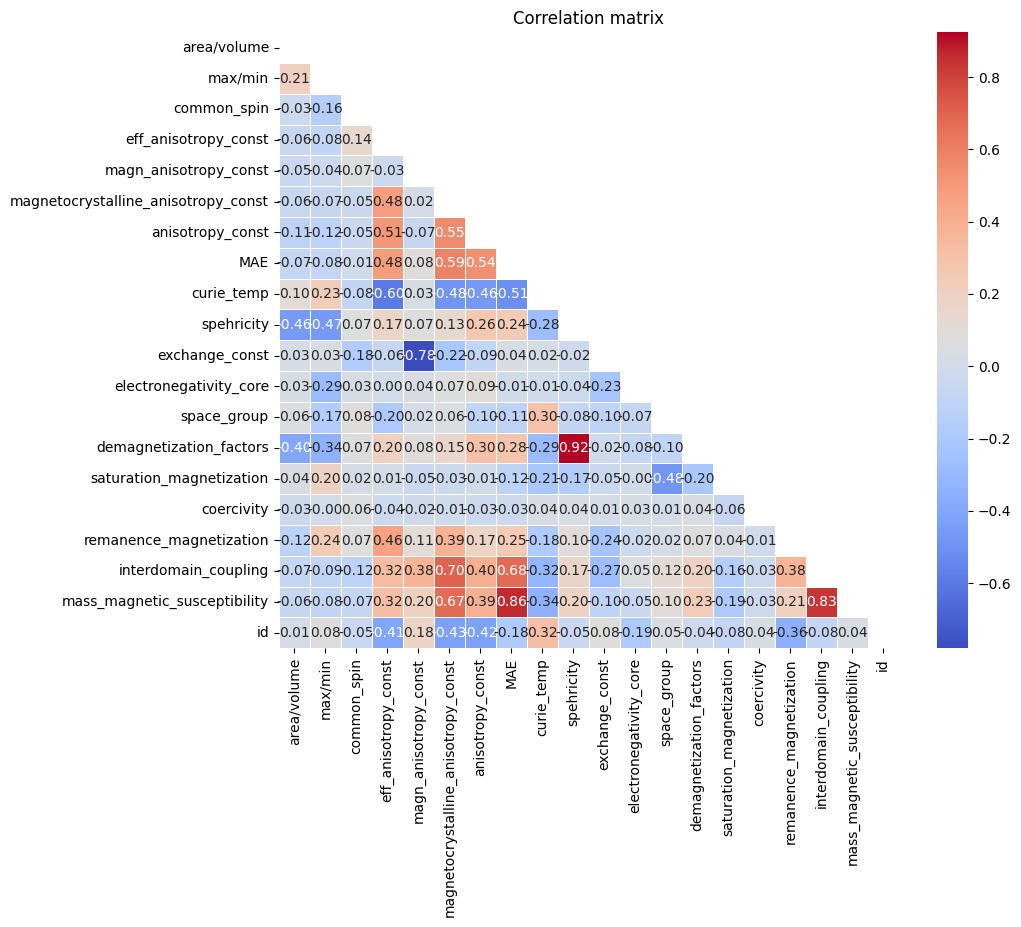

In [170]:
correlation_matrix = df_cor.corr()
# Создаем маску для скрытия верхней половины матрицы
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Строим тепловую карту с маской
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

#круговые нужны по следующим
space_group_core
space_group_shell
crystal_structure

In [171]:
df['space_group'] = df['space_group'].astype(int)
df['space_group_shell'] = df['space_group_shell'].astype(int)
# Удаление строк с пропущенными значениями в колонке
df = df.dropna(subset=['crystal_structure'])
df['crystal_structure'] = df['crystal_structure'].astype(int)

<ipython-input-171-43284900dcbc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crystal_structure'] = df['crystal_structure'].astype(int)


In [172]:
# Создадим словарь, чтобы перевести простаранственные группы в числовые обозначения пространнственных групп
dict_space_group = {
    1: "P1", 2: "P-1", 3: "P121", 4: "P1211", 5: "C121", 6: "P1m1", 7: "P1c1", 8: "C1m1",
    9: "C1c1", 10: "P12/m1", 11: "P121/m1", 12: "C12/m1", 13: "P12/c1", 14: "P121/c1",
    15: "C2/c", 16: "P222", 17: "P2221", 18: "P21212", 19: "P212121", 20: "C2221",
    21: "C222", 22: "F222", 23: "I222", 24: "I212121", 25: "Pmm2", 26: "Pmc21", 27: "Pcc2",
    28: "Pma2", 29: "Pca21", 30: "Pnc2", 31: "Pmn21", 32: "Pba2", 33: "Pna21", 34: "Pnn2",
    35: "Cmm2", 36: "Cmc21", 37: "Ccc2", 38: "Amm2", 39: "Abm2", 40: "Ama2", 41: "Aba2",
    42: "Fmm2", 43: "Fdd2", 44: "Imm2", 45: "Iba2", 46: "Ima2", 47: "Pmmm", 48: "Pnnn",
    49: "Pccm", 50: "Pban", 51: "Pmma", 52: "Pnna", 53: "Pmna", 54: "Pcca", 55: "Pbam",
    56: "Pccn", 57: "Pbcm", 58: "Pnnm", 59: "Pmmn", 60: "Pbcn", 61: "Pbca", 62: "Pnma",
    63: "Cmcm", 64: "Cmca", 65: "Cmmm", 66: "Cccm", 67: "Cmma", 68: "Ccca", 69: "Fmmm",
    70: "Fddd", 71: "Immm", 72: "Ibam", 73: "Ibca", 74: "Imma", 75: "P4", 76: "P41",
    77: "P42", 78: "P43", 79: "I4", 80: "I41", 81: "P-4", 82: "I-4", 83: "P4/m", 84: "P42/m",
    85: "P4/n", 86: "P42/n", 87: "I4/m", 88: "I41/a", 89: "P422", 90: "P4212", 91: "P4122",
    92: "P41212", 93: "P4222", 94: "P42212", 95: "P4322", 96: "P43212", 97: "I422",
    98: "I4122", 99: "P4mm", 100: "P4bm", 101: "P42cm", 102: "P42nm", 103: "P4cc",
    104: "P4nc", 105: "P42mc", 106: "P42bc", 107: "I4mm", 108: "I4cm", 109: "I41md",
    110: "I41cd", 111: "P-42m", 112: "P-42c", 113: "P-421m", 114: "P-421c", 115: "P-4m2",
    116: "P-4c2", 117: "P-4b2", 118: "P-4n2", 119: "I-4m2", 120: "I-4c2", 121: "I-42m",
    122: "I-42d", 123: "P4/mmm", 124: "P4/mcc", 125: "P4/nbm", 126: "P4/nnc", 127: "P4/mbm",
    128: "P4/mnc", 129: "P4/nmm", 130: "P4/ncc", 131: "P42/mmc", 132: "P42/mcm",
    133: "P42/nbc", 134: "P42/nnm", 135: "P42/mbc", 136: "P42/mnm", 137: "P42/nmc",
    138: "P42/ncm", 139: "I4/mmm", 140: "I4/mcm", 141: "I41/amd", 142: "I41/acd",
    143: "P3", 144: "P31", 145: "P32", 146: "R3", 147: "P-3", 148: "R-3", 149: "P312",
    150: "P321", 151: "P3112", 152: "P3121", 153: "P3212", 154: "P3221", 155: "R32",
    156: "P3m1", 157: "P31m", 158: "P3c1", 159: "P31c", 160: "R3m", 161: "R3c", 162: "P-31m",
    163: "P-31c", 164: "P-3m1", 165: "P-3c1", 166: "R-3m", 167: "R-3c", 168: "P6", 169: "P61",
    170: "P65", 171: "P62", 172: "P64", 173: "P63", 174: "P-6", 175: "P6/m", 176: "P63/m",
    177: "P622", 178: "P6122", 179: "P6522", 180: "P6222", 181: "P6422", 182: "P6322",
    183: "P6mm", 184: "P6cc", 185: "P63cm", 186: "P63mc", 187: "P-6m2", 188: "P-6c2",
    189: "P-62m", 190: "P-62c", 191: "P6/mmm", 192: "P6/mcc", 193: "P63/mcm", 194: "P63/mmc",
    195: "P23", 196: "F23", 197: "I23", 198: "P213", 199: "I213", 200: "Pm-3", 201: "Pn-3",
    202: "Fm-3", 203: "Fd-3", 204: "Im-3", 205: "Pa-3", 206: "Ia-3", 207: "P432", 208: "P4232",
    209: "F432", 210: "F4132", 211: "I432", 212: "P4332", 213: "P4132", 214: "I4132",
    215: "P-43m", 216: "F-43m", 217: "I-43m", 218: "P-43n", 219: "F-43c", 220: "I-43d",
    221: "Pm-3m", 222: "Pn-3n", 223: "Pm-3n", 224: "Pn-3m", 225: "Fm-3m", 226: "Fm-3c",
    227: "Fd-3m", 228: "Fd-3c", 229: "Im-3m", 230: "Ia-3d"
}

# Для проверки первого столбца
dict_crystal_structure = {
    "triclinic":[1, 2],
    "monoclinic":[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "orthorhombic":[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74],
    "tetragonal":[75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142],
    "trigonal":[143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167],
    "hexagonal":[168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194],
    "cubic":[195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230]
}

In [173]:
# Замена числовых обозначений пространственных групп на текстовые эквиваленты
df['space_group'] = df['space_group'].map(dict_space_group)
df['space_group_shell'] = df['space_group_shell'].map(dict_space_group)
df['crystal_structure'] = df['crystal_structure'].map(dict_space_group)

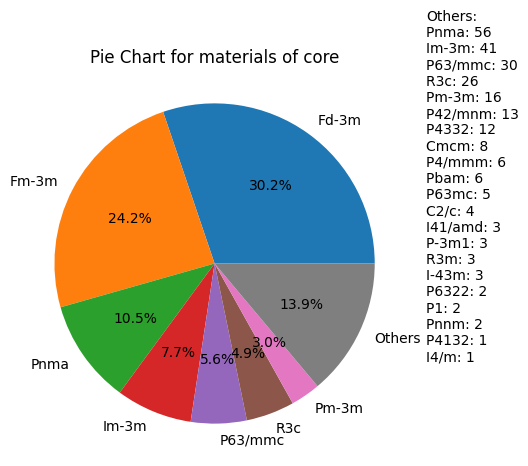

In [177]:
# Данные для круговой диаграммы из колонки df['orig_c2']
orig_c1_counts = df['space_group'].value_counts()

# Вычисление общего процента для "Others"
total_count_c2 = sum(orig_c1_counts)
threshold = 0.028
other_count_c2 = orig_c1_counts[orig_c1_counts / total_count_c2 < threshold].sum()

# Фильтрация данных и добавление в "Others"
orig_c2_counts_filtered = orig_c1_counts[orig_c1_counts / total_count_c2 >= threshold]
orig_c2_counts_filtered['Others'] = other_count_c2

# Создание круговой диаграммы для df['orig_c2']
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
wedges, texts, autotexts = plt.pie(orig_c2_counts_filtered, labels=orig_c2_counts_filtered.index, autopct='%1.1f%%', textprops=dict(color="black"))
plt.title('Pie Chart for materials of core')
plt.axis('equal')  # Делает круговую диаграмму круглой

# Аннотация для отображения содержимого "Others"
others_content = '\n'.join([f'{label}: {count}' for label, count in orig_c1_counts.items() if label != 'Others' and count < other_count_c2])
plt.text(1.1, 0.7, f'Others:\n{others_content}', verticalalignment='center', horizontalalignment='left', transform=plt.gca().transAxes)

# Цвет текста автоподписей должен быть белым
for autotext in autotexts:
    autotext.set_color('black')

plt.show()

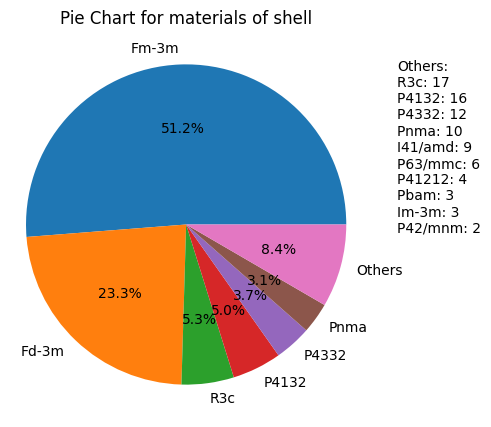

In [175]:
# Данные для круговой диаграммы из колонки df['orig_c2']
orig_c2_counts = df['space_group_shell'].value_counts()

# Вычисление общего процента для "Others"
total_count_c2 = sum(orig_c2_counts)
threshold = 0.028
other_count_c2 = orig_c2_counts[orig_c2_counts / total_count_c2 < threshold].sum()

# Фильтрация данных и добавление в "Others"
orig_c2_counts_filtered = orig_c2_counts[orig_c2_counts / total_count_c2 >= threshold]
orig_c2_counts_filtered['Others'] = other_count_c2

# Создание круговой диаграммы для df['orig_c2']
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
wedges, texts, autotexts = plt.pie(orig_c2_counts_filtered, labels=orig_c2_counts_filtered.index, autopct='%1.1f%%', textprops=dict(color="black"))
plt.title('Pie Chart for materials of shell')
plt.axis('equal')  # Делает круговую диаграмму круглой

# Аннотация для отображения содержимого "Others"
others_content = '\n'.join([f'{label}: {count}' for label, count in orig_c2_counts.items() if label != 'Others' and count < other_count_c2])
plt.text(1.1, 0.7, f'Others:\n{others_content}', verticalalignment='center', horizontalalignment='left', transform=plt.gca().transAxes)

# Цвет текста автоподписей должен быть белым
for autotext in autotexts:
    autotext.set_color('black')

plt.show()

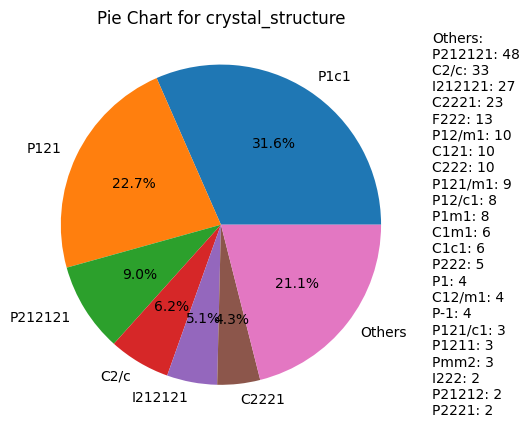

In [176]:
# Данные для круговой диаграммы из колонки df['orig_c2']
orig_c2_counts = df['crystal_structure'].value_counts()

# Вычисление общего процента для "Others"
total_count_c2 = sum(orig_c2_counts)
threshold = 0.028
other_count_c2 = orig_c2_counts[orig_c2_counts / total_count_c2 < threshold].sum()

# Фильтрация данных и добавление в "Others"
orig_c2_counts_filtered = orig_c2_counts[orig_c2_counts / total_count_c2 >= threshold]
orig_c2_counts_filtered['Others'] = other_count_c2

# Создание круговой диаграммы для df['orig_c2']
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
wedges, texts, autotexts = plt.pie(orig_c2_counts_filtered, labels=orig_c2_counts_filtered.index, autopct='%1.1f%%', textprops=dict(color="black"))
plt.title('Pie Chart for crystal_structure')
plt.axis('equal')  # Делает круговую диаграмму круглой

# Аннотация для отображения содержимого "Others"
others_content = '\n'.join([f'{label}: {count}' for label, count in orig_c2_counts.items() if label != 'Others' and count < other_count_c2])
plt.text(1.1, 0.5, f'Others:\n{others_content}', verticalalignment='center', horizontalalignment='left', transform=plt.gca().transAxes)

# Цвет текста автоподписей должен быть белым
for autotext in autotexts:
    autotext.set_color('black')

plt.show()